# Imports

In [24]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
#import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
## Setting figures to timeseries-friendly
plt.rcParams['figure.figsize'] = (12,4)
plt.rcParams['figure.facecolor'] = 'white'
sns.set_context("talk", font_scale=0.9)

# Load the Data

In [4]:
df = pd.read_csv('Data/Chicago/Chicago-Crime_2010.csv')
df

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,7592258,01/01/2010 01:00:00 AM,OFFENSE INVOLVING CHILDREN,CRIM SEX ABUSE BY FAM MEMBER,RESIDENCE,False,True,2422,24.0,49.0,42.019716,-87.666177
1,7297433,01/01/2010 01:00:00 PM,NARCOTICS,MANU/DEL:CANNABIS 10GM OR LESS,SIDEWALK,True,False,1532,15.0,28.0,41.888659,-87.748993
2,7298225,01/01/2010 01:00:00 AM,THEFT,FROM BUILDING,RESIDENCE,False,False,613,6.0,21.0,41.742683,-87.651098
3,7297408,01/01/2010 01:00:00 AM,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,1112,11.0,27.0,41.896320,-87.718782
4,7297265,01/01/2010 01:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE-GARAGE,False,False,833,8.0,13.0,41.772403,-87.732358
...,...,...,...,...,...,...,...,...,...,...,...,...
370489,7868622,12/31/2010 12:45:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,True,331,3.0,5.0,41.773485,-87.573221
370490,7869132,12/31/2010 12:50:00 PM,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,False,True,2432,24.0,40.0,42.001065,-87.661254
370491,7868511,12/31/2010 12:53:00 AM,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False,611,6.0,17.0,41.751181,-87.663461
370492,7868549,12/31/2010 12:55:00 AM,CRIMINAL DAMAGE,TO PROPERTY,GAS STATION,False,False,213,2.0,3.0,41.823860,-87.615162


# Inspect the Data

In [10]:
df.index

DatetimeIndex(['2010-01-01 00:00:00', '2010-01-01 00:00:00',
               '2010-01-01 00:00:00', '2010-01-01 00:00:00',
               '2010-01-01 00:00:00', '2010-01-01 00:00:00',
               '2010-01-01 00:00:00', '2010-01-01 00:00:00',
               '2010-01-01 00:00:00', '2010-01-01 00:00:00',
               ...
               '2010-12-31 23:31:00', '2010-12-31 23:38:00',
               '2010-12-31 23:40:00', '2010-12-31 23:40:00',
               '2010-12-31 23:45:00', '2010-12-31 23:45:00',
               '2010-12-31 23:50:00', '2010-12-31 23:50:00',
               '2010-12-31 23:50:00', '2010-12-31 23:58:00'],
              dtype='datetime64[ns]', name='Date', length=370494, freq=None)

- The 'Date' column is already set as the index of the dataset, so I am going to move on to removing columns that are not necessary for the stakeholder questions.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 370494 entries, 2010-01-01 00:00:00 to 2010-12-31 23:58:00
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    370494 non-null  int64  
 1   Primary Type          370494 non-null  object 
 2   Description           370494 non-null  object 
 3   Location Description  370422 non-null  object 
 4   Arrest                370494 non-null  bool   
 5   Domestic              370494 non-null  bool   
 6   Beat                  370494 non-null  int64  
 7   District              370494 non-null  float64
 8   Ward                  370476 non-null  float64
 9   Latitude              370012 non-null  float64
 10  Longitude             370012 non-null  float64
dtypes: bool(2), float64(4), int64(2), object(3)
memory usage: 29.0+ MB


- There are some missing values, but I am going to be dropping some of the columns that have them. I will check them once the columns have been dropped.

In [12]:
# Drop extra columns that aren't needed
drop_cols = ['ID','Latitude','Longitude']
df = df.drop(columns=drop_cols)
df.isna().sum()

Primary Type             0
Description              0
Location Description    72
Arrest                   0
Domestic                 0
Beat                     0
District                 0
Ward                    18
dtype: int64

- There are still some missing values in the dataset, but I will drop the rows if the need arises. Those rows still contain information about crimes that can be used.

# Question 1: Which district has the most crimes? Which has the least?

- For this Dataset, each row represents a crime that was committed. In this case, I am looking at crime in the year 2010.

In [18]:
df['District'].value_counts().sort_index(ascending = False)

31.0       25
25.0    23050
24.0    11265
22.0    12766
20.0     6103
19.0    16180
18.0    15197
17.0    11288
16.0    11951
15.0    16713
14.0    15195
12.0    17269
11.0    22586
10.0    16130
9.0     18528
8.0     26528
7.0     22616
6.0     21398
5.0     16286
4.0     21221
3.0     19705
2.0     15968
1.0     12526
Name: District, dtype: int64

## Visualizing the Total Crimes by District

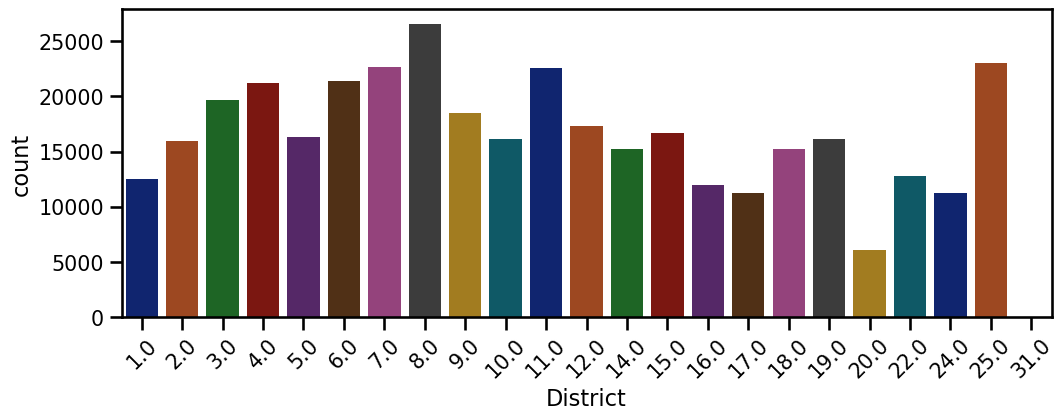

In [26]:
## visualizing crimes by district
fig, ax = plt.subplots()
sns.countplot(data=df, x='District',palette='dark')
ax.xaxis.set_tick_params(rotation=45);

In [31]:
# finding the districts with the most and least crimes
df['District'].value_counts(ascending=False).to_frame(name='# of Crimes')

,# of Crimes
8.0,26528
25.0,23050
7.0,22616
11.0,22586
6.0,21398
4.0,21221
3.0,19705
9.0,18528
12.0,17269
15.0,16713


- The district with the most crimes in 2010 was district 8 with 26,528 crimes, while district 31 had the least with 25 crimes. I want to know the crimes that were committed in district 31 in order to better understand why the number of crimes were so low.

## Better Understanding Low Crime District 31

In [39]:
df_31 = df[df['District'] == 31.0]
df_31

,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward
Date,,,,,,,,
2010-01-14 08:00:00,THEFT,OVER $500,AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA,False,False,1654,31.0,NaN
2010-01-14 11:15:00,CRIMINAL DAMAGE,TO VEHICLE,AIRPORT EXTERIOR - NON-SECURE AREA,False,False,1654,31.0,NaN
2010-01-20 15:00:00,THEFT,$500 AND UNDER,AIRPORT PARKING LOT,False,False,1654,31.0,NaN
2010-01-21 18:00:00,CRIMINAL DAMAGE,TO VEHICLE,AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA,False,False,1654,31.0,NaN
2010-02-02 23:15:00,ASSAULT,SIMPLE,AIRPORT EXTERIOR - SECURE AREA,False,False,1654,31.0,NaN
2010-03-04 23:00:00,CRIMINAL DAMAGE,TO VEHICLE,AIRPORT BUILDING NON-TERMINAL - SECURE AREA,False,False,1654,31.0,NaN
2010-04-02 23:29:00,CRIMINAL TRESPASS,TO VEHICLE,STREET,False,False,2422,31.0,49.0
2010-04-08 08:40:00,THEFT,OVER $500,AIRPORT EXTERIOR - NON-SECURE AREA,False,False,1654,31.0,NaN
2010-05-20 13:00:00,THEFT,$500 AND UNDER,OTHER,False,False,1654,31.0,41.0


In [40]:
df_31['Primary Type'].value_counts(ascending=False)

THEFT                  10
CRIMINAL DAMAGE         8
DECEPTIVE PRACTICE      2
BATTERY                 2
ASSAULT                 1
CRIMINAL TRESPASS       1
MOTOR VEHICLE THEFT     1
Name: Primary Type, dtype: int64